# mean mode median

In [1]:
import statistics as st
x=[115.3, 195.5, 120.5, 110.2, 90.4, 105.6, 110.9, 116.3, 122.3, 125.4,90.4]

In [2]:
mean=sum(x)/len(x)
print(mean)
print(st.mean(x))

118.43636363636365
118.43636363636364


In [4]:
def median(x):
    x.sort()
    if len(x)%2==0:
        return (x[int(len(x)//2)-1]+x[int((len(x)+1)//2)-1])/2
    else:
        return x[(len(x)+1)//2-1]

In [5]:
med=median(x)
print(med)
print(st.median(x))

115.3
115.3


In [5]:
y=list(set(x))

In [6]:
mx=0
mode=0
for i in y:
    if x.count(i)>=mx:
        mx=x.count(i)
        mode=i
    else:
        continue   
print(mode)
print(st.mode(x))

90.4
90.4


In [7]:
var=0
s=0
for i in x:
    s+=(i-mean)**2
var=s/(len(x)-1)
print(var)
print(st.variance(x))
print(var**0.5)
print(st.stdev(x))

788.2365454545454
788.2365454545454
28.07555067054866
28.07555067054866


In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
x_r=[[c]for c in x]
mm_sc=MinMaxScaler()
s_sc=StandardScaler()
mms=mm_sc.fit_transform(x_r)
ss=s_sc.fit_transform(x_r)
mms=[v[0] for v in mms]
ss=[v[0] for v in ss]
print(mms)
print(ss)

[0.0, 0.0, 0.1446241674595622, 0.1883920076117983, 0.19505233111322562, 0.23691722169362495, 0.24643196955280688, 0.2863939105613701, 0.3035204567078972, 0.3330161750713606, 0.9999999999999999]
[-1.047344951391453, -1.047344951391453, -0.4795236936980326, -0.3076830499223918, -0.2815333867391421, -0.11716407530157322, -0.07980741361121658, 0.07709056548828137, 0.1443325565309232, 0.2601382077710291, 2.8788401922650286]


In [9]:
minv=min(x)
maxv=max(x)
MMS=[]
SS=[]
for i in x:
    MMS.append((i-minv)/(maxv-minv))
    SS.append((i-st.mean(x))/st.stdev(x))
print(MMS)
print(SS)

    

[0.0, 0.0, 0.14462416745956222, 0.18839200761179828, 0.1950523311132255, 0.23691722169362506, 0.24643196955280677, 0.2863939105613701, 0.3035204567078972, 0.3330161750713606, 1.0]
[-0.9986042291869938, -0.9986042291869938, -0.4572079025979365, -0.29336427744598453, -0.2684315518793831, -0.11171156260360354, -0.07609338322274449, 0.07350297017686365, 0.13761569306240987, 0.24803204914307322, 2.7448664237412927]


# linear regression

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

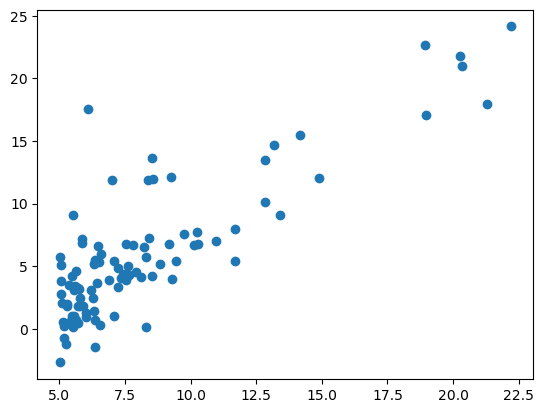

In [20]:
df=pd.read_csv(r"C:\Users\amana\Downloads\Food-Truck(For Linear Regression Program).csv",names=['a','b'])
x=df['a']
y=df['b']
x_mean=st.mean(x)
y_mean=st.mean(y)
plt.scatter(x,y)

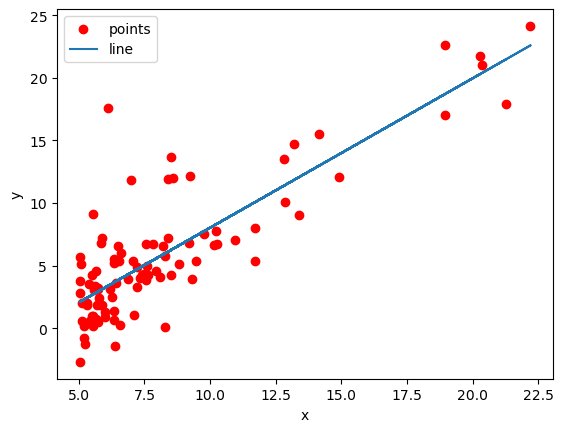

In [24]:
n=0
d=0
for i in range(len(x)):
    n+=(x[i]-x_mean)*(y[i]-y_mean)
    d+=(x[i]-x_mean)**2
m=n/d
c=y_mean-m*x_mean
line=[]
for i in x:
    line.append(m*i+c)
plt.scatter(x,y,label='points',color='r')
plt.plot(x,line,label='line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [25]:
nm=st.mean(line)
sse=0
ssr=0
sst=0
for i in range(len(y)):
    sse+=(y[i]-line[i])**2
for i in range(len(line)):
    ssr+=(line[i]-nm)**2
for i in range(len(y)):
    sst+=(y[i]-y_mean)**2
r_sq=1-(sse/sst)
print(sse,ssr,sst,r_sq)

868.5324469391846 2046.31460471804 2914.8470516572247 0.7020315537841397


# decision tree

In [2]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv(r"C:\Users\amana\Downloads\zoo_data(For Decision Tree Program).csv")
df

,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [9]:
X=df.drop('1.7',axis=1)
Y=df["1.7"]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

In [11]:
clf_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(x_train,y_train)
y_pred=clf_entropy.predict(x_test)
print('confusion matrix: ',confusion_matrix(y_test,y_pred))
print('classification report: ',classification_report(y_test,y_pred))
print('accuracy: ',accuracy_score(y_test,y_pred)*100)

confusion matrix:  [[10  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  0  0  4  1]
 [ 0  0  0  0  0  0  0]]
classification report:                precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8
           3       0.00      0.00      0.00         1
           4       0.71      1.00      0.83         5
           5       0.00      0.00      0.00         1
           6       1.00      0.80      0.89         5
           7       0.00      0.00      0.00         0

    accuracy                           0.90        30
   macro avg       0.53      0.54      0.53        30
weighted avg       0.89      0.90      0.89        30

accuracy:  90.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

# K means

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from copy import deepcopy
import random as rd
k=3

In [17]:
data=pd.DataFrame({"X1":[5.9, 4.6, 6.2, 4.7, 5.5, 5. , 4.9, 6.7, 5.1, 6.],"X2":[3.2, 2.9, 2.8, 3.2, 4.2, 3. , 3.1, 3.1, 3.8, 3. ]})
print(data["X1"])

0    5.9
1    4.6
2    6.2
3    4.7
4    5.5
5    5.0
6    4.9
7    6.7
8    5.1
9    6.0
Name: X1, dtype: float64


In [19]:
X=np.array(list(zip(data["X1"],data["X2"])))
X

array([[5.9, 3.2],
       [4.6, 2.9],
       [6.2, 2.8],
       [4.7, 3.2],
       [5.5, 4.2],
       [5. , 3. ],
       [4.9, 3.1],
       [6.7, 3.1],
       [5.1, 3.8],
       [6. , 3. ]])

In [22]:
cent=np.array(list(zip([6.2, 6.6 ,6.5],[3.2, 3.7, 3.0])))
cent_old=np.zeros(cent.shape)
clusters=np.zeros(len(X))
print(clusters,cent,cent_old)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [[6.2 3.2]
 [6.6 3.7]
 [6.5 3. ]] [[0. 0.]
 [0. 0.]
 [0. 0.]]


In [20]:
def eucl(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)
error=eucl(cent,cent_old,None)

iterr=0

In [24]:
while error != 0:
        
        iterr = iterr + 1
        for i in range(len(X)):
            distances = eucl(X[i], cent)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        cent_old = deepcopy(cent)
        print("Old Centroid")
        print(cent)
            
        
        # Finding the new centroids by taking the Mean
        for p in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == p]
            cent[p] = np.mean(points, axis=0)
        print(" New Centroids after ", iterr," Iteration \n", cent)
        error = eucl(cent, cent_old, None)
        print("Error  ... ",error)
        print("Data points belong to which cluster")
        print(clusters)
        print("********************************************************")

Old Centroid
[[5.17142857 3.17142857]
 [5.5        4.2       ]
 [6.45       2.95      ]]
 New Centroids after  2  Iteration 
 [[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
Error  ...  0.548478879841925
Data points belong to which cluster
[2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]
********************************************************
Old Centroid
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
 New Centroids after  3  Iteration 
 [[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
Error  ...  0.0
Data points belong to which cluster
[2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]
********************************************************


# PCA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\amana\Downloads\iris(For PCA Program).csv")
x=df.drop('species',axis=1)
y=df['species']

In [3]:
cov=np.cov(x.T)
egval,egvec=np.linalg.eig(cov)
print(egval,egvec)

[4.22824171 0.24267075 0.0782095  0.02383509] [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [4]:
s_ind=np.argsort(egval)[::-1]
s_egval=egval[s_ind]
s_egvec=egvec[:,s_ind]

In [5]:
eig_sub=s_egvec[:,:2]
x_red=np.dot(eig_sub.transpose(),x.transpose()).transpose()

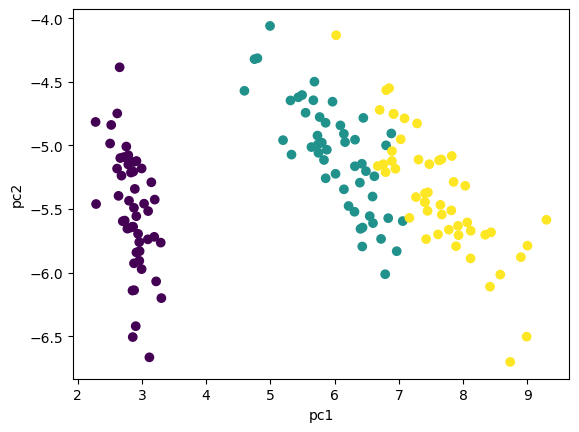

In [6]:
plt.scatter(x_red[:,0],x_red[:,-1],c=y)
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.show()

# Logistic Regression